In [13]:
# pip install tensorflow

In [47]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt



In [7]:
# Load the data
df = pd.read_csv("datasets/new_unicorn_data_updated.csv")

In [8]:
df.head()

,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Funding_Numeric ($B),Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation
0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,7.000,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0
1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,2.000,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0
2,Stripe,2014-01-23,Fintech,United States,San Francisco,North America,2010,$2B,2.000,95,"Khosla Ventures, LowercaseCapital, capitalG",95.0,"Khosla Ventures, LowercaseCapital, capitalG",4,95.0
3,Klarna,2011-12-12,Fintech,Sweden,Stockholm,Europe,2005,$4B,4.000,46,"Institutional Venture Partners, Sequoia Capita...",6.7,"Institutional Venture Partners, Sequoia Capita...",6,6.7
4,Canva,2018-01-08,Internet Software And Services,Australia,Surry Hills,Oceania,2012,$572M,0.572,40,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40.0


In [11]:
# Fix negative values

df['Years to Unicorn'] = df['Years to Unicorn'].replace(-3, 1)

df['Years to Unicorn'] = df['Years to Unicorn'].replace(0, 1)


In [16]:
# Encode 'Industry'
industry_le = LabelEncoder()
df['Industry_Data'] = industry_le.fit_transform(df['Industry'])

# Encode 'Country'
country_le = LabelEncoder()
df['Country_Data'] = country_le.fit_transform(df['Country'])

# Print the mapping dictionaries for 'Industry' and 'Country'
industry_mapping_dict = dict(zip(df['Industry_Data'].unique(), industry_le.inverse_transform(df['Industry_Data'].unique())))
sorted_industry_mapping_dict = sorted(industry_mapping_dict.items(), key=lambda x: x[0])

country_mapping_dict = dict(zip(df['Country_Data'].unique(), country_le.inverse_transform(df['Country_Data'].unique())))
sorted_country_mapping_dict = sorted(country_mapping_dict.items(), key=lambda x: x[0])

print("Industry_Data Mapping:")
for key, value in sorted_industry_mapping_dict:
    print(f"{key} = {value}")

print("\nCountry_Data Mapping:")
for key, value in sorted_country_mapping_dict:
    print(f"{key} = {value}")

Industry_Data Mapping:
0 = Artificial Intelligence
1 = Auto And Transportation
2 = Consumer And Retail
3 = Cybersecurity
4 = Data Management And Analytics
5 = E-commerce And Direct-to-consumer
6 = Edtech
7 = Fintech
8 = Hardware
9 = Health
10 = Internet Software And Services
11 = Mobile And Telecommunications
12 = Other
13 = Supply Chain, Logistics, And Delivery
14 = Travel

Country_Data Mapping:
0 = Argentina
1 = Australia
2 = Austria
3 = Bahamas
4 = Belgium
5 = Bermuda
6 = Brazil
7 = Canada
8 = Chile
9 = China
10 = Colombia
11 = Croatia
12 = Denmark
13 = Estonia
14 = Finland
15 = France
16 = Germany
17 = Hong Kong
18 = India
19 = Indonesia
20 = Ireland
21 = Israel
22 = Italy
23 = Japan
24 = Lithuania
25 = Luxembourg
26 = Malaysia
27 = Mexico
28 = Netherlands
29 = Nigeria
30 = Norway
31 = Philippines
32 = Senegal
33 = Singapore
34 = South Africa
35 = South Korea
36 = Spain
37 = Sweden
38 = Switzerland
39 = Thailand
40 = Turkey
41 = United Arab Emirates
42 = United Kingdom
43 = United 

In [17]:
# CompanyAge
df["CompanyAge"] = 2023 - df["Year Founded"]

In [18]:
df["CompanyAge"]

0       21
1       15
2       13
3       18
4       11
        ..
1034    11
1035     8
1036     5
1037    18
1038     9
Name: CompanyAge, Length: 1039, dtype: int64

In [20]:
df.head()

,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Funding_Numeric ($B),Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation,Industry_Data,Country_Data,CompanyAge
0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,7.000,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0,12,43,21
1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,2.000,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0,5,9,15
2,Stripe,2014-01-23,Fintech,United States,San Francisco,North America,2010,$2B,2.000,95,"Khosla Ventures, LowercaseCapital, capitalG",95.0,"Khosla Ventures, LowercaseCapital, capitalG",4,95.0,7,43,13
3,Klarna,2011-12-12,Fintech,Sweden,Stockholm,Europe,2005,$4B,4.000,46,"Institutional Venture Partners, Sequoia Capita...",6.7,"Institutional Venture Partners, Sequoia Capita...",6,6.7,7,37,18
4,Canva,2018-01-08,Internet Software And Services,Australia,Surry Hills,Oceania,2012,$572M,0.572,40,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40.0,10,1,11


In [21]:
# Select features
features = ['Industry_Data', 'Country_Data', 'CompanyAge', 'Funding_Numeric ($B)']

In [22]:
X = df[features]
X

,Industry_Data,Country_Data,CompanyAge,Funding_Numeric ($B)
0,12,43,21,7.000
1,5,9,15,2.000
2,7,43,13,2.000
3,7,37,18,4.000
4,10,1,11,0.572
...,...,...,...,...
1034,5,9,11,0.379
1035,5,9,8,0.990
1036,2,9,5,0.080
1037,7,42,18,0.792


In [24]:
Y = df['Years to Unicorn']
Y

0       10
1       10
2        4
3        6
4        6
        ..
1034     5
1035     2
1036     3
1037    16
1038     6
Name: Years to Unicorn, Length: 1039, dtype: int64

In [25]:
# Check the dimensions of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1039, 4)
Shape of Y: (1039,)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
input_dim = X_train_scaled.shape[1]

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(32, activation='relu'),  # Another hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)  # Output layer for regression
])

In [31]:
# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [32]:
start_time = time.time()  # Record the start time
history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, validation_split=0.2)
end_time = time.time()  # Record the end time


Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 76.0914 - mean_absolute_error: 6.7560 - val_loss: 74.5120 - val_mean_absolute_error: 6.8357
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 64.3488 - mean_absolute_error: 6.0251 - val_loss: 60.9524 - val_mean_absolute_error: 5.9434
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 50.5593 - mean_absolute_error: 5.1341 - val_loss: 45.5381 - val_mean_absolute_error: 4.9260
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 37.3814 - mean_absolute_error: 4.1483 - val_loss: 31.3680 - val_mean_absolute_error: 3.9974
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 25.2256 - mean_absolute_error: 3.3422 - val_loss: 20.8769 - val_mean_absolute_error: 3.2791
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 16.3209 - mean_absolute_error: 2.7535 - val_loss: 14.3917 - val_mean_absolute_error: 2.8638
Epoch 7/1

In [37]:
Y_pred = model.predict(X_test_scaled)

7/7 [==============================] - 0s 2ms/step


In [43]:
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.1573412004321963


In [44]:
# Root Mean Squared Error
rmse = mean_squared_error(Y_test, Y_pred)
print(f'Root Mean Squared Error: {np.sqrt(rmse)}')

Root Mean Squared Error: 1.7768908802828034


In [45]:
from sklearn.metrics import r2_score
r2_score_result = r2_score(Y_test, Y_pred)
r2_score_result

0.8262618225373825

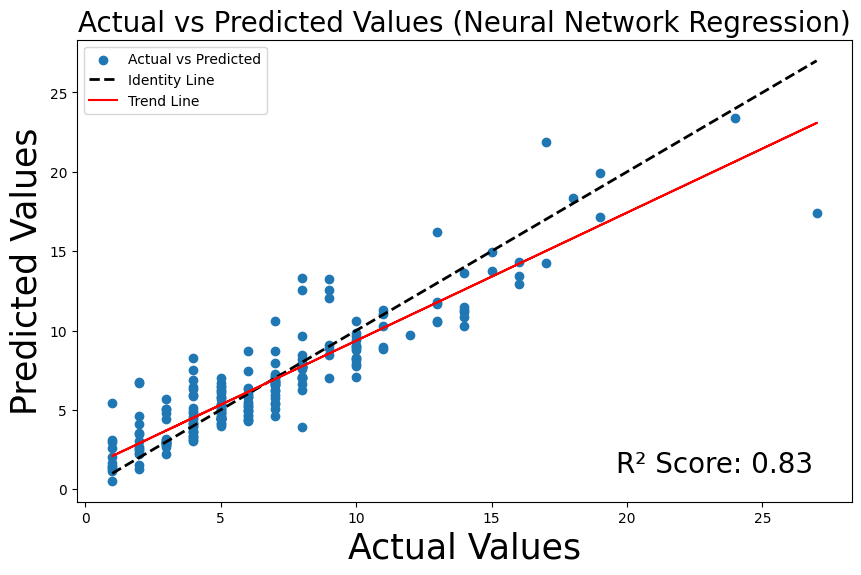

In [53]:
from sklearn.metrics import r2_score

# Calculate the R² score
r2_score_result = r2_score(Y_test, Y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, label='Actual vs Predicted')

# Add the identity line (perfect prediction line)
identity_line = [Y_test.min(), Y_test.max()]
plt.plot(identity_line, identity_line, 'k--', lw=2, label='Identity Line')

# Add a trend line (optional, for visualization)
trend_line = np.polyfit(Y_test, Y_pred, 1)
plt.plot(Y_test, np.polyval(trend_line, Y_test), color='red', label='Trend Line')

# Increase the font size for the title and axis labels
plt.title('Actual vs Predicted Values (Neural Network Regression)', fontsize=20)
plt.xlabel('Actual Values', fontsize=25)
plt.ylabel('Predicted Values', fontsize=25)

# Add R² score as text on the plot at the bottom right
plt.text(0.95, 0.05, f'R² Score: {r2_score_result:.2f}', 
         transform=plt.gca().transAxes, fontsize=20, 
         verticalalignment='bottom', horizontalalignment='right')

plt.legend()
plt.show()
